# The Metropolitan Museum of Art Open Access

## Framing the Problem

## Obtaining Data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 2000)

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,Maker,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",NaN,"Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 43 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Object Name                1924 non-null object
Title                      1924 non-null object
Culture                    1517 non-null object
Period                     0 non-null float64
Dynasty                    0 non-null float64
Reign                      0 non-null float64
Portfolio                  0 non-null float64
Artist Role                720 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Suffix              9 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Art

In [6]:
data.shape

(1924, 43)

## Analysing Data

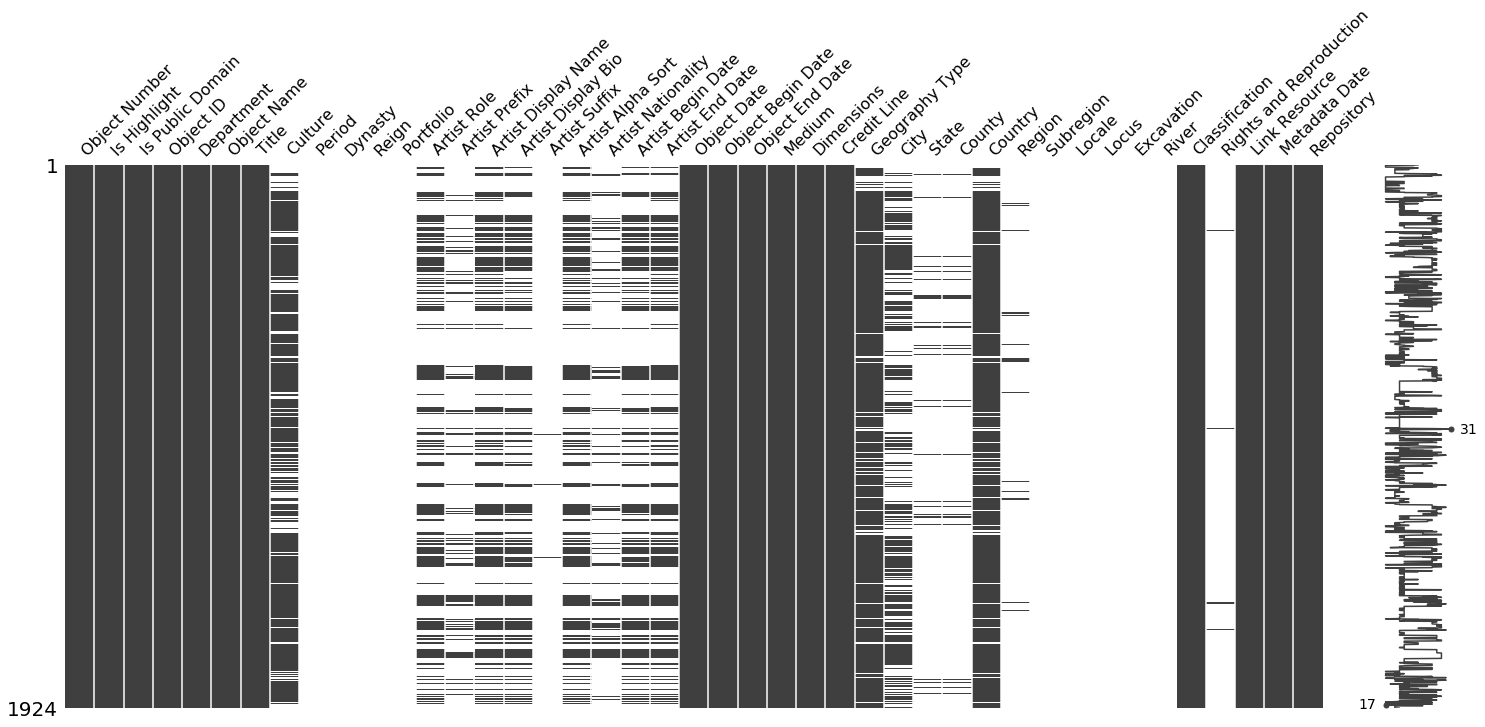

In [7]:
ms.matrix(data)

In [8]:
# values = [data[data[i].isnull()].count() for i in data.columns]
# labels = list(data.columns)
# plt.pie(x=values, labels = labels)

## Feature Engineering

### Filling Missing Values

#### Dropping Columns with no values 

In [9]:
data.drop(['Period', 'Dynasty', 'Reign','Portfolio','Subregion','Locale','Locus','Excavation','River'], axis=1, inplace=True)

#### Working with "Artist Suffix" Column [Sharukh]

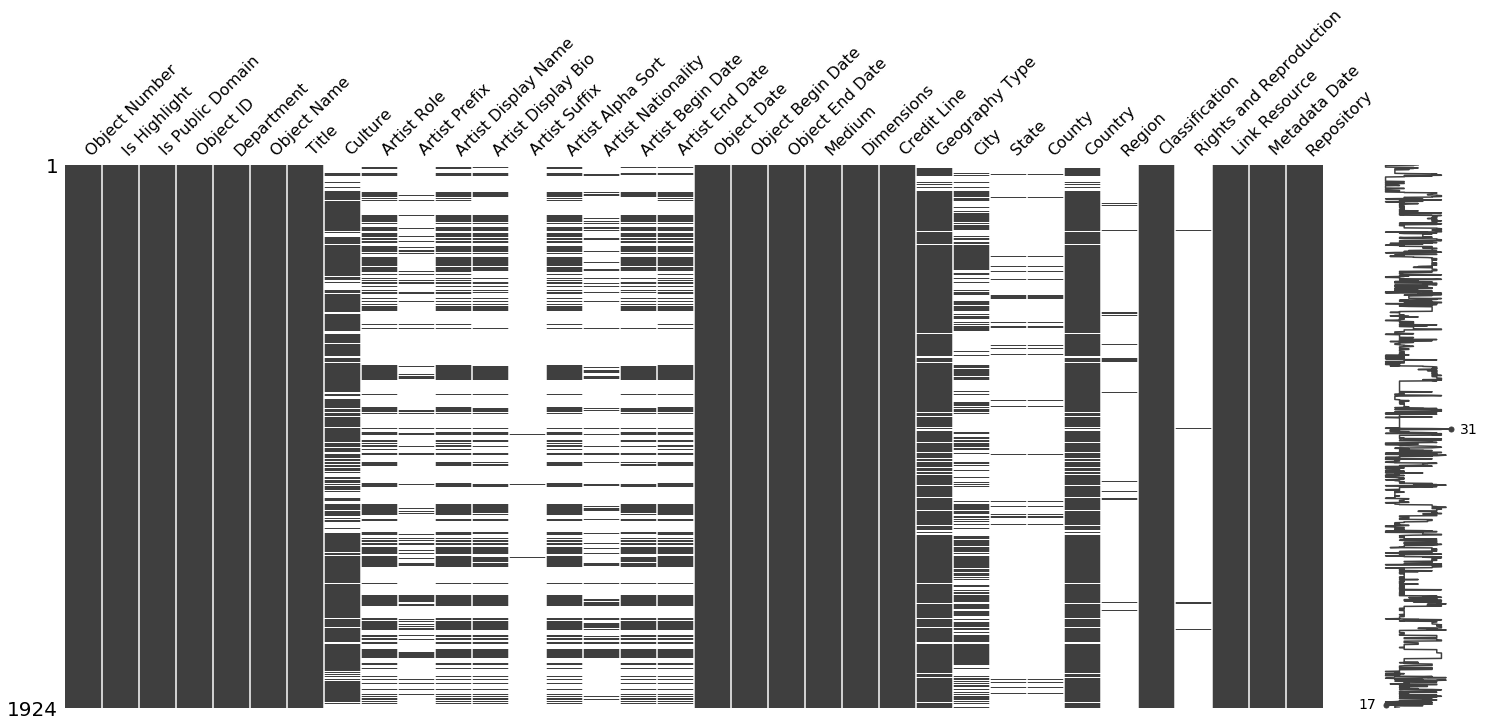

In [10]:
ms.matrix(data)

In [11]:
data['Artist Suffix'].value_counts()

or           8
Tradition    1
Name: Artist Suffix, dtype: int64

In [12]:
data.drop('Artist Suffix', axis=1, inplace=True)

#### Working with "Culture Columns" [Sarath]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 33 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Object Name                1924 non-null object
Title                      1924 non-null object
Culture                    1517 non-null object
Artist Role                720 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null in

In [14]:
data['Culture'].value_counts()

American                        1188
Chinese, for American market      78
British                           70
American, Shaker                  30
Chinese                           24
British (American market)         22
Mexican                           21
British, probably                 21
American or British               14
American or French                 8
British, possibly                  6
British or Irish                   5
European                           5
American, Japanese                 4
French                             4
British or Flemish                 2
American, probably                 2
Dutch                              2
Spanish                            2
Bermudian, possibly                2
Canadian                           1
Dutch, probably                    1
American or Irish                  1
Venezuelan                         1
French, possibly                   1
Irish                              1
German                             1
N

In [15]:
data['Culture'].value_counts()

American                        1188
Chinese, for American market      78
British                           70
American, Shaker                  30
Chinese                           24
British (American market)         22
Mexican                           21
British, probably                 21
American or British               14
American or French                 8
British, possibly                  6
British or Irish                   5
European                           5
American, Japanese                 4
French                             4
British or Flemish                 2
American, probably                 2
Dutch                              2
Spanish                            2
Bermudian, possibly                2
Canadian                           1
Dutch, probably                    1
American or Irish                  1
Venezuelan                         1
French, possibly                   1
Irish                              1
German                             1
N

In [16]:
data.groupby(['Culture','Object Name']).count()

Object Number  \
Culture                      Object Name                                                         
American                     Advertisement                                                   1   
                             Ale glass                                                       2   
                             Andiron                                                        26   
                             Architectural elements                                          2   
                             Armchair                                                       89   
                             Astral lamp                                                     2   
                             Aviary                                                          1   
                             Baby's bottle                                                   1   
                             Baking dish                                                     1   
                             Balcony                                                         1   
                             Ball                                                            2   
                             Baluster                                                        7   
                             Banister-back armchair                                          1   
                             Banister-back chair                                             1   
                             Banjo clock                                                     3   
                             Bank                                                            1   
                             Baptismal bowl                                                  1   
                             Baptismal certificate                                           1   
                             Basin                                                          16   
                             Basin Stand                                                     3   
                             Basin stand                                                     1   
                             Basket                                                          2   
                             Beaker                                                         42   
                             Bean pot                                                        1   
                             Bedstead                                                        9   
                             Bell                                                            2   
                             Bell pull                                                       1   
                             Bellows                                                         1   
                             Bench                                                           5   
                             Berry dish                                                      1   
                             Betty lamp                                                      2   
                             Bible                                                           1   
                             Bill holder                                                     1   
                             Birdhouse                                                       1   
                             Birth and baptismal certificate, Fraktur                       13   
                             Birth certificate, Fraktur                                      2   
                             Birth, baptismal and marriage certificate, Fraktur              1   
                             Bitters bottle                                                  3   
                             Blotter                                                         2   
                             Blotter holders                   

In [17]:
data.set_index(data['Object Name'], inplace=True)

In [18]:
data['Culture'].head(5)

Object Name
Coin    NaN
Coin    NaN
Coin    NaN
Coin    NaN
Coin    NaN
Name: Culture, dtype: object

In [19]:
data['Culture'].tail(5)

Object Name
Pin           NaN
Pin           NaN
Pin           NaN
Clock         NaN
Clock    American
Name: Culture, dtype: object

In [20]:
data['Culture'].fillna(method='ffill', inplace=True)
data['Culture'].fillna(method='bfill', inplace=True)

In [21]:
data.reset_index(drop=True, inplace=True)

In [22]:
data['Culture'].value_counts()

American                        1489
British                          104
Chinese, for American market      83
American, Shaker                  40
British (American market)         33
Mexican                           33
American or British               32
British, probably                 30
Chinese                           24
American or French                 9
British or Flemish                 6
British, possibly                  6
French                             5
European                           5
British or Irish                   5
American, Japanese                 4
Irish                              2
American, probably                 2
Dutch                              2
Spanish                            2
Bermudian, possibly                2
Canadian                           1
American or Irish                  1
Dutch, probably                    1
Venezuelan                         1
French, possibly                   1
German                             1
N

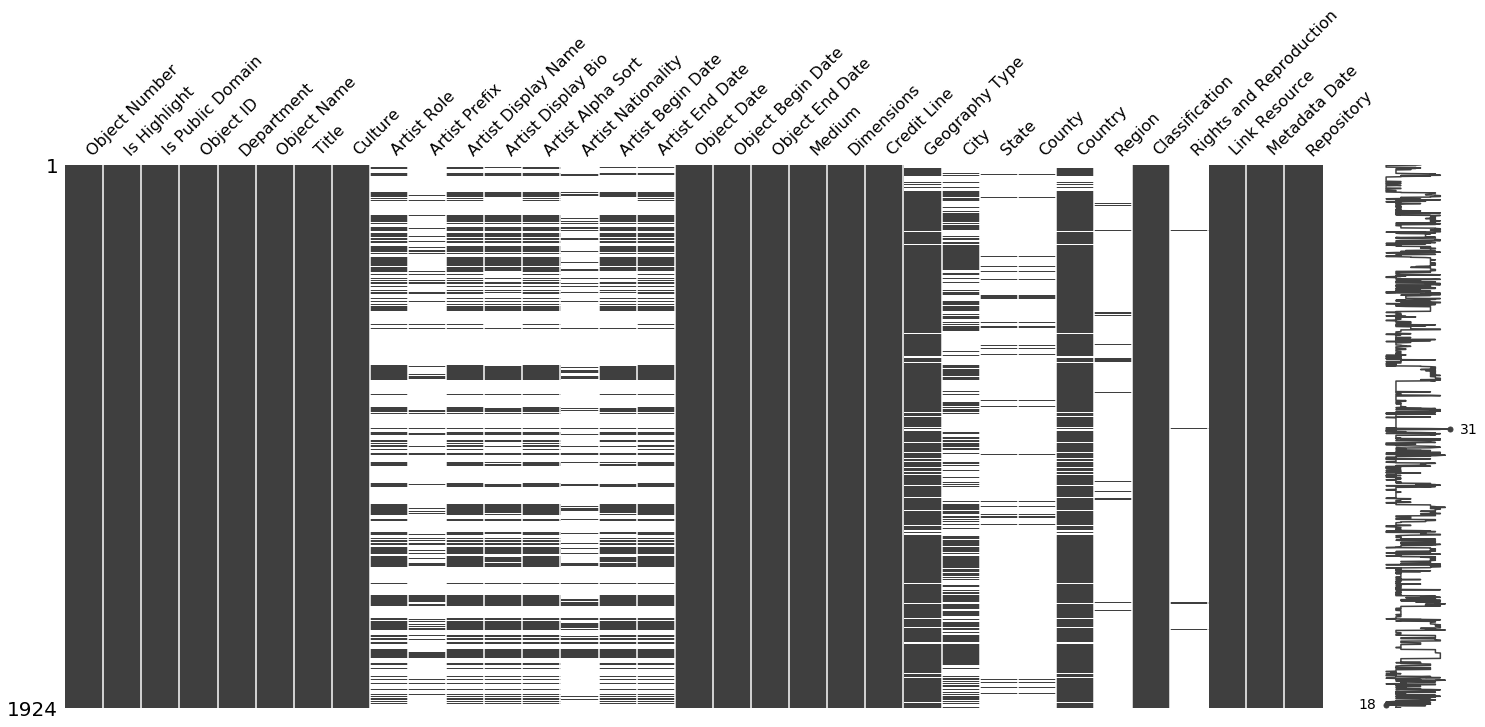

In [23]:
ms.matrix(data)

#### Working with "Artist Role" Column [Sarath]

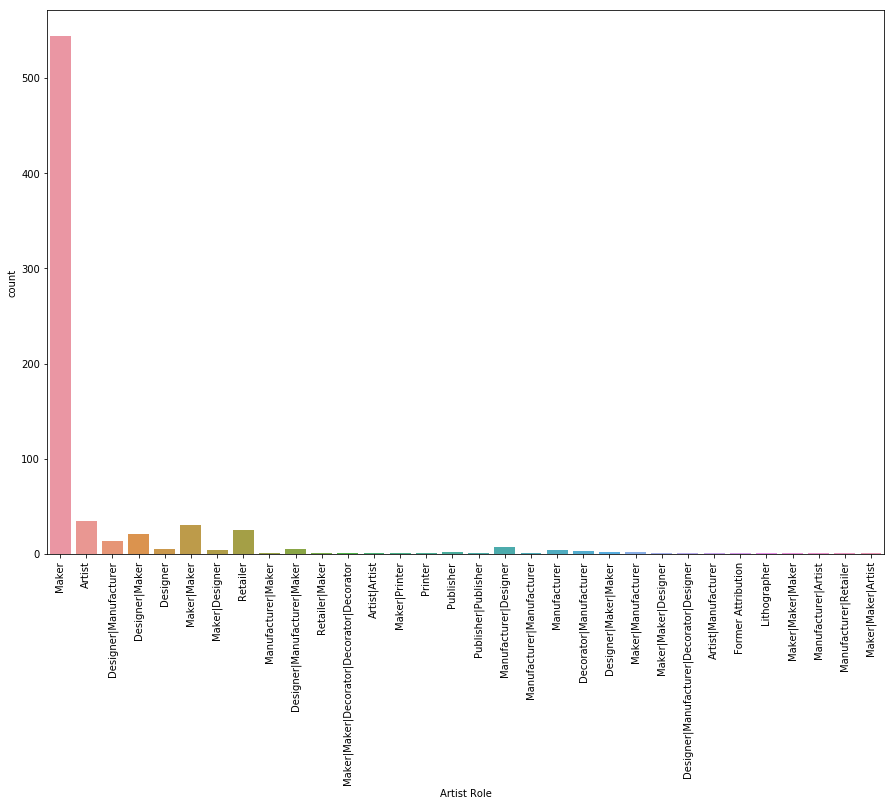

In [24]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(data['Artist Role'])

In [25]:
data.reset_index(drop=True, inplace=True)

In [26]:
data.drop('Artist Role',inplace=True, axis=1)

#### Working on "Country" Column [Sharukh]

In [27]:
data.set_index('Object Name',inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Coin to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obj

In [29]:
data.head(3)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
Object Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Coin,1979.486.1,False,False,1,American Decorative Arts,One-dollar Liberty Head Coin,American,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...","Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,1980.264.5,False,False,2,American Decorative Arts,Ten-dollar Liberty Head Coin,American,NaN,Christian Gobrecht,1785–1844,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.9,False,False,3,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [30]:
data['Country'].fillna(method='ffill',inplace=True)

In [31]:
data['Country'].fillna(method='bfill',inplace=True)

In [32]:
data.shape

(1924, 31)

In [33]:
data.head(10)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
Object Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Coin,1979.486.1,False,False,1,American Decorative Arts,One-dollar Liberty Head Coin,American,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...","Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,1980.264.5,False,False,2,American Decorative Arts,Ten-dollar Liberty Head Coin,American,NaN,Christian Gobrecht,1785–1844,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.9,False,False,3,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.10,False,False,4,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.11,False,False,5,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.12,False,False,6,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/6,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.13,False,False,7,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/7,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.14,False,False,8,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/8,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.15,False,False,9,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/9,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


#### Working on "Geography" Column [Sharukh]

In [34]:
data['Geography Type'].tail(3)

Object Name
Pin               Made in
Clock             Made in
Clock    Possibly made in
Name: Geography Type, dtype: object

In [35]:
data['Geography Type'].head(3)

Object Name
Coin    NaN
Coin    NaN
Coin    NaN
Name: Geography Type, dtype: object

In [36]:
data['Geography Type'].fillna(method='bfill', inplace=True)

In [37]:
data['Geography Type'].head(3)

Object Name
Coin    Made in
Coin    Made in
Coin    Made in
Name: Geography Type, dtype: object

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Coin to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obj

In [39]:
data.sort_values(by='Artist Begin Date', inplace=True)

In [40]:
data.set_index(data['Artist Begin Date']).head(5)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
Artist Begin Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1607,10.125.680,False,True,945,American Decorative Arts,Box,American,Attributed to,John Thurston,1607–1685,"Thurston, John",NaN,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,Dedham|Medfield,NaN,NaN,United States|United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1611 |1638,10.125.685,True,True,1997,American Decorative Arts,Chest,American,Possibly,William Searle|Thomas Dennis,died 1667|1638–1706,"Searle, William|Dennis, Thomas",NaN,1611 |1638,1667 |1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1611 |1638,10.125.24,False,True,1989,American Decorative Arts,Chest,American,Attributed to,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,"Searle, William|Searle-Dennis, shop tradition|...",NaN,1611 |1638,1667 |1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1624 |1605,2014.53,False,True,399,American Decorative Arts,Beaker,American,NaN,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,"Hull, John|Sanderson, Robert",NaN,1624 |1605,1683 |1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,Boston,NaN,NaN,United States,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1631,10.125.2,False,True,940,American Decorative Arts,Box,American,Attributed to,William Buell,died 1681,"Buell, William",NaN,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,Windsor,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [41]:
data[data['Artist End Date'].isnull()]['Artist Begin Date'].value_counts()

1787    2
Name: Artist Begin Date, dtype: int64

#### Working on "Artist Begin Date" and "Artist End Date" Columns [Sarath]

In [42]:
data[data['Artist Begin Date'].isnull()]['Artist End Date'].value_counts()

9999               54
9999      |9999     4
Name: Artist End Date, dtype: int64

In [43]:
data['Artist Begin Date'].fillna(value=0, inplace=True)

In [44]:
data['Artist End Date'].fillna(value=0, inplace=True)

In [45]:
data['Artist Begin Date'].value_counts()

0                                                   1279
1770                                                  34
1816                                                  26
1867                                                  24
1856                                                  23
1825                                                  17
1877                                                  16
1824                                                  15
1848      |1892                                       14
1763                                                  13
1818                                                  12
1863                                                  11
1734                                                  10
1836                                                  10
1723                                                  10
1848      |1902                                       10
1829                                                   9
1875                           

In [46]:
data['Artist End Date'].value_counts()

0                                                   1223
9999                                                  66
1854                                                  31
1851                                                  28
1888                                                  26
1907                                                  18
1925                                                  18
1887                                                  15
1822                                                  14
1959                                                  14
1795                                                  13
1882                                                  12
1818                                                  12
1891                                                  12
1852                                                  12
1933      |1902                                       12
1933      |1932                                       10
1886                           

In [47]:
def strings_to_int(df):
    start = df[0]
    end = df[1]
    
    if start == 0:
        return start
    else:
        if len(str(start)) > 4:
            start = start.split('|')
            start = [int(i.strip()) for i in start]
        else:
            start = [int(start)]
            
        if len(str(end)) > 4:
            end = end.split('|')
            end = [int(i.strip()) for i in end]
        else:
            end = [int(end)]
        
        l = len(start)
        if len(end) < len(start):
            l = len(end)
        
        buff = 0
        result = 0
        for i in range(0, l):
            if end[i] - start[i] > buff:
                buff = end[i] - start[i]
                result = start[i]
        return result

In [48]:
data['Artist Start Date'] = data[['Artist Begin Date','Artist End Date']].apply(strings_to_int, axis=1)

In [49]:
data['Artist Start Date'].isnull().value_counts()

False    1924
Name: Artist Start Date, dtype: int64

In [50]:
def strings_to_int_end(df):
    start = df[0]
    end = df[1]
    
    if end == 0:
        return start
    else:
        if len(str(start)) > 4:
            start = start.split('|')
            start = [int(i.strip()) for i in start]
        else:
            start = [int(start)]
            
        if len(str(end)) > 4:
            end = end.split('|')
            end = [int(i.strip()) for i in end]
        else:
            end = [int(end)]
        
        l = len(start)
        if len(end) < len(start):
            l = len(end)
        
        buff = 0
        result = 0
        for i in range(0, l):
            if end[i] - start[i] > buff:
                buff = end[i] - start[i]
                result = end[i]
        return result

In [51]:
data['Artist End Date'] = data[['Artist Begin Date','Artist End Date']].apply(strings_to_int_end, axis=1)

In [52]:
data['Artist End Date'].isnull().value_counts()

False    1924
Name: Artist End Date, dtype: int64

In [53]:
data[data['Artist End Date'] == 9999]

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository,Artist Start Date
Object Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cameo medallion,83.2.282,False,False,1112,American Decorative Arts,Cameo Medallion,British,Manufactured by,Jean-Baptiste Nini|Josiah Wedgwood and Sons,"Italian, Urbino 1717–1786 Chaumont-sur-Loire|1...","Nini, Jean-Baptiste|Wedgwood and Sons, Josiah",Italian,1717 |1759,9999,1777 (?),1777,1777,Earthenware,4 x 3 1/16 in. (10.2 x 7.8 cm),"Gift of William H. Huntington, 1883",Made in,NaN,Staffordshire,Staffordshire,England,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1759
"Birth and baptismal certificate, Fraktur",34.100.63,False,True,532,American Decorative Arts,Birth and Baptismal Certificate,American,Attributed to|Possibly,Henrich Dulhauer|Johann Heinrich Otto,ca. 1733–ca. 1800,"Dulhauer, Henrich|Otto, Johann Heinrich",NaN,1730,9999,1784,1784,1784,Ink and watercolor on paper,13 1/2 x 17 in. (34.3 x 43.2 cm),"Gift of Mrs. Robert W. de Forest, 1933",Made in,NaN,Lancaster County,Lancaster County,United States,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1730
Candlestick,23.91.2,False,False,1338,American Decorative Arts,Candlestick,British (American market),NaN,Josiah Wedgwood and Sons,1759–present,"Wedgwood and Sons, Josiah",NaN,1759,9999,1775–1800,1775,1800,"Earthenware, glass, gilt bronze",H. 12 1/4 in. (31.1 cm),"Rogers Fund, 1923",Made in,NaN,Staffordshire,Staffordshire,England,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1759
Cameo medallion,83.2.281,False,False,1113,American Decorative Arts,Cameo Medallion,British,Possibly,Josiah Wedgwood and Sons,1759–present,"Wedgwood and Sons, Josiah",NaN,1759,9999,1760–1883,1760,1883,Jasperware,Diam. 3 5/8 in. (9.2 cm),"Gift of William H. Huntington, 1883",Made in,NaN,Staffordshire,Staffordshire,England,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1759
"Cameo medallion, minature",83.2.283,False,False,481,American Paintings and Sculpture,Cameo Medallion of Benjamin Franklin,American,Possibly,Josiah Wedgwood and Sons,1759–present,"Wedgwood and Sons, Josiah",NaN,1759,9999,1776–1800,1776,1800,"Wax, glass",Diam. 2 1/2 in. (6.4 cm),"Gift of William H. Huntington, 1883",Probably made in,NaN,Staffordshire,Staffordshire,England,NaN,Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1759
Cameo medallion,83.2.289,False,False,1114,American Decorative Arts,Cameo Medallion,British,NaN,Josiah Wedgwood and Sons,1759–present,"Wedgwood and Sons, Josiah",NaN,1759,9999,1760–1883,1760,1883,Earthenware,2 5/8 x 2 in. (6.7 x 5.1 cm),"Gift of William H. Huntington, 1883",Made in,NaN,Staffordshire,Staffordshire,England,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1759
Chocolate pot,"48.135.1a, b",False,False,2055,American Decorative Arts,Chocolate Pot,German,NaN,Koenigliche Porzellan Manufaktur,"German, founded 1763",NaN,NaN,1763,9999,ca. 1844–47,1841,1847,Porcelain,H. 12 in. (30.5 cm),"Bequest of Adeline R. Brown, 1947",Made in,Berlin,NaN,NaN,Germany,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1763
Candlestick,46.140.320,False,True,1230,American Decorative Arts,Candlesti

In [54]:
data['Artist Begin Date'] = data['Artist Start Date']
data.drop('Artist Start Date', inplace=True, axis=1)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Box to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          1924 non-null int64
Artist End Date            1924 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obj

In [56]:
data['Artist Average Lifespan'] = data[['Artist Begin Date','Artist End Date']].apply(lambda y: abs(int(y[0])-int(y[1])), axis=1)

In [57]:
data[(data['Artist Average Lifespan'] > 90) & (data['Artist Average Lifespan'] < 100)]['Artist Average Lifespan'].value_counts()

92    16
93     2
96     2
94     1
91     1
Name: Artist Average Lifespan, dtype: int64

In [58]:
def calculate_mean_lifespan(df):
    buff = 0
    count = 0
    for i in df:
        if i <= 96 and i > 0:
            buff += i
            count += 1
    return buff // count

In [59]:
mean_average_lifespan = calculate_mean_lifespan(data['Artist Average Lifespan'])
mean_average_lifespan

60

In [60]:
df = data[['Artist Begin Date', 'Object Begin Date']].apply(lambda x: abs(int(x[0]) - int(x[1])), axis=1)
mean_object_start_period = df[df < 90].mean()

In [61]:
def start_date(df):
    artist = df[0]
    object_date = df[1]
    
    if artist != 0:
        return artist
    else:
        return object_date - int(mean_object_start_period)

In [62]:
data['Artist Begin Date'] = data[['Artist Begin Date', 'Object Begin Date']].apply(start_date, axis=1)

In [63]:
def end_date(df):
    artist_begin = df[0]
    artist_end = df[1]
    
    if artist_end != 0 and artist_end != 9999:
        return artist_end
    else:
        return artist_begin + int(mean_average_lifespan)

In [64]:
data['Artist End Date'] = data[['Artist Begin Date','Artist End Date']].apply(end_date, axis=1)

In [65]:
data['Artist Begin Date'].value_counts()

1771    157
1671    101
1756     77
1801     59
1731     55
1741     52
1848     50
1821     43
1766     38
1770     35
1721     34
1856     32
1816     30
1781     30
1758     27
1711     26
1867     24
1768     23
1791     20
1851     20
1811     20
1831     20
1806     19
1761     19
1818     18
1701     18
1825     17
1728     16
1747     16
1877     16
1763     16
1786     16
1736     16
1824     15
1841     15
1751     13
1746     13
1641     13
1621     13
1734     12
1863     12
1646     12
1707     11
1723     11
1808     11
1880     11
1836     11
1797     10
1793     10
1571     10
1726     10
1853     10
1837     10
1703     10
1846      9
1788      9
1866      9
1661      9
1796      9
1696      9
1829      9
1859      8
1803      8
1875      8
1748      8
1798      8
1813      8
1817      8
1820      8
1718      8
1828      8
1864      7
1773      7
1776      7
1668      6
1757      6
1784      6
1783      6
1631      6
1618      6
1759      6
1733      6
1774      6
1717

In [66]:
data['Artist End Date'].value_counts()

1831    152
1731    101
1816     79
1791     58
1861     54
1801     52
1851     48
1881     44
1781     36
1818     36
1826     36
1933     33
1854     32
1841     31
1891     31
1888     30
1828     25
1771     25
1761     23
1821     21
1871     20
1866     19
1925     19
1911     18
1907     18
1887     17
1807     16
1786     16
1882     15
1959     15
1901     15
1796     15
1811     15
1681     14
1906     14
1822     14
1908     14
1706     14
1701     13
1795     13
1856     13
1846     12
1788     12
1848     12
1819     11
1767     10
1806     10
1886     10
1815     10
1631     10
1897     10
1898     10
1853      9
1910      9
1873      9
1809      9
1721      9
1880      9
1833      9
1940      9
1756      9
1778      9
1954      9
1890      9
1808      8
1855      8
1868      8
1836      8
1753      8
1858      8
1835      8
1878      8
1922      8
1913      7
1916      7
1837      7
1864      7
1924      7
1678      6
1893      6
1789      6
1728      6
1899      6
1863

In [67]:
data.drop('Artist Average Lifespan', axis=1, inplace=True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Box to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          1924 non-null int64
Artist End Date            1924 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obj

#### Working with "City", "State" and "County" Column [Sarath]

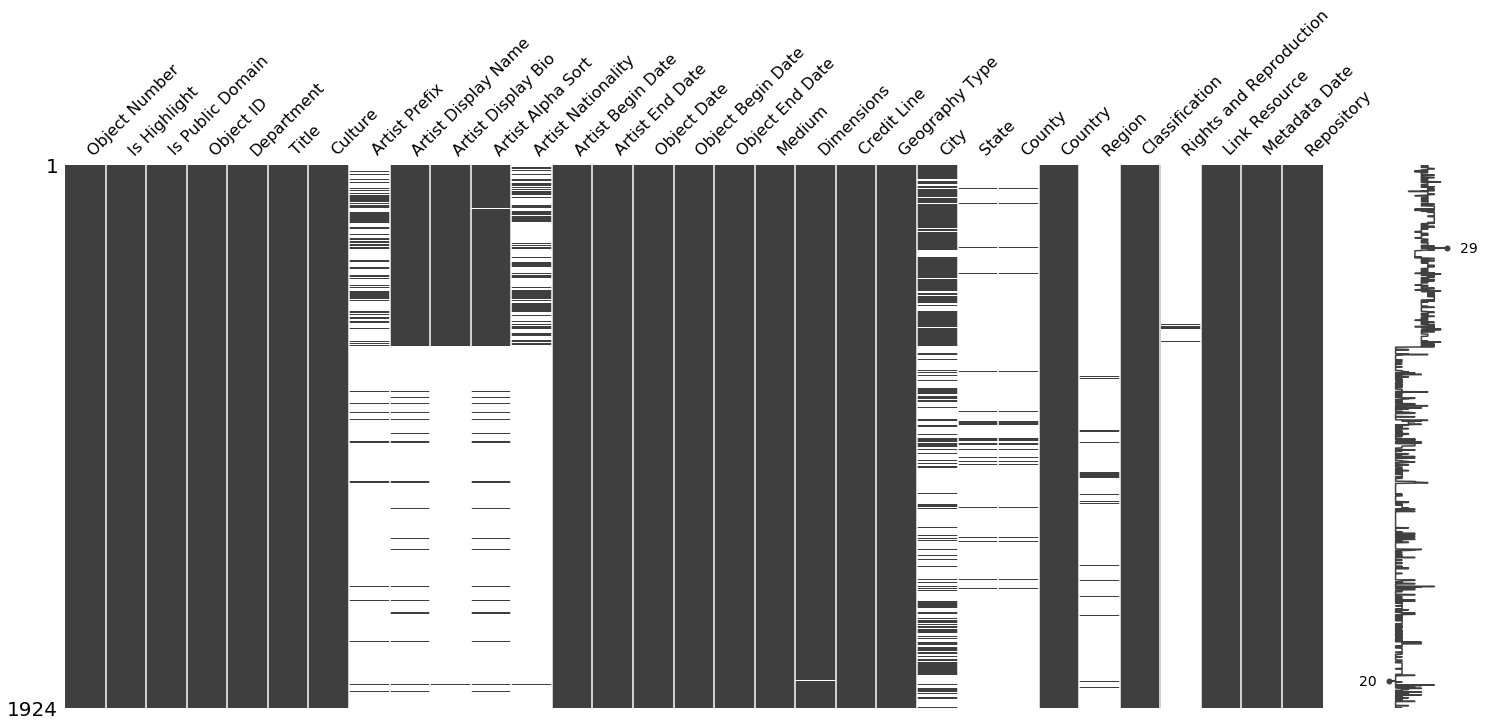

In [69]:
ms.matrix(data)

In [70]:
data.reset_index(drop=True, inplace=True)

In [71]:
data.head(5)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,10.125.680,False,True,945,American Decorative Arts,Box,American,Attributed to,John Thurston,1607–1685,"Thurston, John",NaN,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,Dedham|Medfield,NaN,NaN,United States|United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,10.125.685,True,True,1997,American Decorative Arts,Chest,American,Possibly,William Searle|Thomas Dennis,died 1667|1638–1706,"Searle, William|Dennis, Thomas",NaN,1638,1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,10.125.24,False,True,1989,American Decorative Arts,Chest,American,Attributed to,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,"Searle, William|Searle-Dennis, shop tradition|...",NaN,1638,1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,2014.53,False,True,399,American Decorative Arts,Beaker,American,NaN,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,"Hull, John|Sanderson, Robert",NaN,1605,1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,Boston,NaN,NaN,United States,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,10.125.2,False,True,940,American Decorative Arts,Box,American,Attributed to,William Buell,died 1681,"Buell, William",NaN,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,Windsor,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [72]:
data['City'].value_counts()

New York                   262
Boston                      77
Philadelphia                77
Pittsburgh                  40
Bennington                  33
Chicago                     24
Bristol                     24
New Lebanon                 18
Sandwich                    17
Baltimore                   15
Chelsea                     15
Washington DC               14
Albany                      13
Providence                  12
Sheffield                   11
Salem                       11
Brooklyn                    11
Newport                     11
Tarentum                    10
East Cambridge              10
Portsmouth                   8
London                       7
Hartford                     7
Newark                       6
Watervliet|New Lebanon       6
New York|Paris               6
Wistarburg                   6
Birmingham                   5
Cincinnati                   5
Norwich                      5
Barnstable                   4
Beverly                      4
Wellingf

In [73]:
data[data['City'].isnull()].head(5)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
9,33.120.618,False,True,1408,American Decorative Arts,Capias,American,NaN,Edward Winslow,1669–1753,"Winslow, Edward",American,1669,1753,1718,1718,1718,Paper,12 1/2 x 7 7/8 in. (31.8 x 20 cm),"Bequest of Alphonso T. Clearwater, 1933",Made in,NaN,NaN,NaN,England|France,NaN,Natural Substances,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
13,10.125.689,False,True,2043,American Decorative Arts,Chest with Drawers,American,Workshop of,Peter Blin,ca. 1675–1725,"Blin, Peter",NaN,1672,1725,1675–1705,1675,1705,"Oak, pine, maple",39 1/4 x 47 1/2 x 22 in. (99.7 x 120.7 x 55.9 cm),"Gift of Mrs. Russell Sage, 1909",Made in,NaN,Wethersfield area,Wethersfield area,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
14,66.190.1,False,True,2019,American Decorative Arts,Chest with drawers,American,Workshop of,Peter Blin,ca. 1675–1725,"Blin, Peter",NaN,1672,1725,1675–1700,1675,1700,"White oak, yellow pine, white cedar",39 7/8 x 48 x 21 1/4 in. (101.3 x 121.9 x 54 cm),"Gift of Mrs. J. Woodhull Overton, 1966",Made in,NaN,Wethersfield,Wethersfield,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
21,"Inst.67.17.4a, b",False,False,1361,American Decorative Arts,Candlestick,British,NaN,Ebenezer Cocker,active ca. 1739,"Cocker, Ebenezer",NaN,1689,1789,1764–66,1764,1766,Silver,H. 10 3/8 in. (26.4 cm),"Gift of John C. Cattus, 1967",Made in,NaN,NaN,NaN,England,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
23,"Inst.67.17.2a, b",False,False,1359,American Decorative Arts,Candlestick,British,NaN,Ebenezer Cocker,active ca. 1739,"Cocker, Ebenezer",NaN,1689,1789,1764–66,1764,1766,Silver,H. 10 3/8 in. (26.4 cm),"Gift of John C. Cattus, 1967",Made in,NaN,NaN,NaN,England,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [74]:
data[['City', 'State']].head(5)

,City,State
0,Dedham|Medfield,NaN
1,Ipswich,NaN
2,Ipswich,NaN
3,Boston,NaN
4,Windsor,NaN


In [75]:
len(data[(data['City'].isnull()) & (data['State'].isnull()) & (data['County'].isnull())])

951

In [76]:
data.drop(['City', 'State', 'County', 'Region'], axis=1, inplace=True)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 27 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          1924 non-null int64
Artist End Date            1924 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null o

#### Working with "Artsit Nationality" Column [Sharukh]

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 27 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          1924 non-null int64
Artist End Date            1924 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null o

In [79]:
data[['Artist Nationality', 'Country']]

,Artist Nationality,Country
0,NaN,United States|United States
1,NaN,United States
2,NaN,United States
3,NaN,United States
4,NaN,United States
5,NaN,United States
6,NaN,United States
7,American,United States
8,NaN,United States
9,American,England|France


In [80]:
data['Country'].unique()

data.is_copy = False

In [81]:
Nationality = data['Artist Nationality']
Object_Origin = data['Country']

Nationality.is_copy = False
Object_Origin.is_copy = False

In [82]:
def fill_nationality(x):
    i = x[0]
    j = x[1]
    if type(i) == float:
        if math.isnan(i) == True:
            if j == 'United States' or j == 'United States|United States':
                return 'American'
            elif j == 'England|France':
                return 'British'
            elif j == 'England':
                return 'British'
            elif j == 'France':
                return 'French'
            elif j == 'Italy':
                return 'Italian'
            elif j == 'Japan':
                return 'Japanese'
            elif j == 'Mexico':
                return 'Mexican'
            elif j == 'Germany':
                return 'German'
            elif j == 'Canada':
                return 'Canadian'
            elif j == 'United States|France':
                return 'French'
            elif j == 'Venezuela':
                return 'Venezuelian'
            elif j == 'Netherlands':
                return 'Dutch'
            elif j == 'Guatemala':
                return 'Ladino'
            elif j == 'Spain':
                return 'Spanish'
            elif j == 'United States|England':
                return 'British'
            elif j == 'China':
                return 'Chinese'
            elif j == 'Netherlands|Netherlands':
                return 'Dutch'
            elif j == 'Czech Republic':
                return 'Czech'
            elif j == 'England|Ireland':
                return 'Scottish'
            elif j == 'Bermuda':
                return 'Bermudian'
            elif j == 'India':
                return 'Indian'
            elif j == 'Ireland|United States':
                return 'Scottish'
            elif j == 'Ireland':
                return 'Scottish'
            elif j == 'England|Netherlands':
                return 'British'
            elif j == 'England|Belgium':
                return 'Dutch'
            elif j == 'France|Italy':
                return 'French'
    else:
        return i

In [83]:
data['Artist Nationality'] = data[['Artist Nationality', 'Country']].apply(fill_nationality, axis=1)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 27 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         1924 non-null object
Artist Begin Date          1924 non-null int64
Artist End Date            1924 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null 

#### Working with "Rights and Reproduction" Column [Sarath]

In [85]:
data.drop('Rights and Reproduction', axis=1, inplace=True)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 26 columns):
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Prefix          269 non-null object
Artist Display Name    720 non-null object
Artist Display Bio     646 non-null object
Artist Alpha Sort      719 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1922 non-null object
Credit Line            1924 non-null object
Geography Type         19

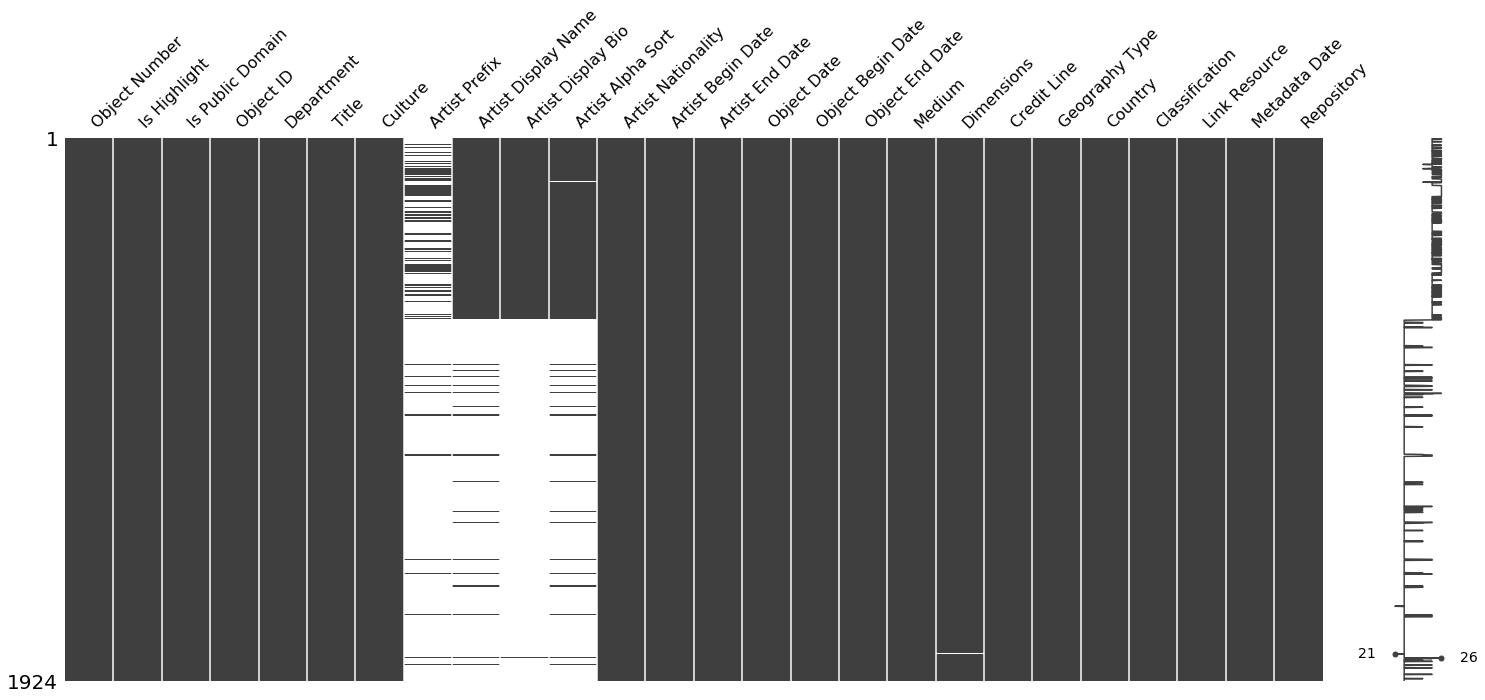

In [87]:
ms.matrix(data)

#### Working with "Artist Display Bio" Column [Sarath]

In [88]:
data.head(5)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
0,10.125.680,False,True,945,American Decorative Arts,Box,American,Attributed to,John Thurston,1607–1685,"Thurston, John",American,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,United States|United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,10.125.685,True,True,1997,American Decorative Arts,Chest,American,Possibly,William Searle|Thomas Dennis,died 1667|1638–1706,"Searle, William|Dennis, Thomas",American,1638,1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,10.125.24,False,True,1989,American Decorative Arts,Chest,American,Attributed to,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,"Searle, William|Searle-Dennis, shop tradition|...",American,1638,1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,2014.53,False,True,399,American Decorative Arts,Beaker,American,NaN,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,"Hull, John|Sanderson, Robert",American,1605,1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,United States,Silver,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,10.125.2,False,True,940,American Decorative Arts,Box,American,Attributed to,William Buell,died 1681,"Buell, William",American,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [89]:
data.tail(5)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
1919,X.139.4,False,True,2085,American Decorative Arts,Cloak Pin,British,NaN,NaN,NaN,NaN,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",2 x 1 3/8 in. (5.1 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1920,X.139.5,False,True,2086,American Decorative Arts,Cloak Pin,British,NaN,NaN,NaN,NaN,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",1 13/16 x 1 3/8 in. (4.6 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1921,X.139.6,False,True,2087,American Decorative Arts,Cloak Pin,British,NaN,NaN,NaN,NaN,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",1 13/16 x 1 3/8 in. (4.6 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1922,83.2.75,False,True,2091,American Decorative Arts,Clock,British,NaN,NaN,NaN,NaN,French,1763,1823,1792–1819,1792,1819,Gilt bronze,H. 12 in. (30.5 cm),"Gift of William H. Huntington, 1883",Made in,France,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1923,1974.214.23,False,False,2093,American Decorative Arts,Clock,American,NaN,NaN,NaN,NaN,American,1861,1921,1890–1905,1890,1905,Bronze,18 5/16 x 9 in. (46.5 x 22.9 cm),"Gift of Mr. and Mrs. Hugh J. Grant, 1974",Possibly made in,United States,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [90]:
def fill_bio(df):
    bio = df[0]
    begin = df[1]
    end = df[2]
    if type(bio).__name__ != 'str':
        return str(begin)+'-'+str(end)
    else:
        return bio

In [91]:
data['Artist Display Bio'] = data[['Artist Display Bio','Artist Begin Date','Artist End Date']].apply(fill_bio, axis=1)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 26 columns):
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Prefix          269 non-null object
Artist Display Name    720 non-null object
Artist Display Bio     1924 non-null object
Artist Alpha Sort      719 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1922 non-null object
Credit Line            1924 non-null object
Geography Type         1

#### Working with "Artist Prefix" Column [Sarath]

In [93]:
data.drop('Artist Prefix', axis=1, inplace=True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 25 columns):
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Display Name    720 non-null object
Artist Display Bio     1924 non-null object
Artist Alpha Sort      719 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1922 non-null object
Credit Line            1924 non-null object
Geography Type         1924 non-null object
Country                

#### Working with "Alpha Sort" Column

In [95]:
def fill_alpha(df):
    alpha = df[0]
    name = df[1]
    if type(alpha).__name__ == 'str' and type(name).__name__ == 'str':
        return name
    else:
        return 'Unknown'

In [96]:
data['Artist Alpha Sort'] = data[['Artist Alpha Sort', 'Artist Display Name']].apply(fill_alpha, axis=1)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 25 columns):
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Display Name    720 non-null object
Artist Display Bio     1924 non-null object
Artist Alpha Sort      1924 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1922 non-null object
Credit Line            1924 non-null object
Geography Type         1924 non-null object
Country               

#### Working with "Artist Display Name" Column

In [99]:
data['Artist Display Name'].fillna(value='Unknown', inplace=True)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 25 columns):
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Display Name    1924 non-null object
Artist Display Bio     1924 non-null object
Artist Alpha Sort      1924 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1922 non-null object
Credit Line            1924 non-null object
Geography Type         1924 non-null object
Country              

In [101]:
data.head(5)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
0,10.125.680,False,True,945,American Decorative Arts,Box,American,John Thurston,1607–1685,John Thurston,American,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,United States|United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,10.125.685,True,True,1997,American Decorative Arts,Chest,American,William Searle|Thomas Dennis,died 1667|1638–1706,William Searle|Thomas Dennis,American,1638,1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,10.125.24,False,True,1989,American Decorative Arts,Chest,American,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,William Searle|the Searle-Dennis shop traditio...,American,1638,1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,2014.53,False,True,399,American Decorative Arts,Beaker,American,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,John Hull|Robert Sanderson Sr.,American,1605,1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,United States,Silver,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,10.125.2,False,True,940,American Decorative Arts,Box,American,William Buell,died 1681,William Buell,American,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [102]:
data.tail(5)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
1919,X.139.4,False,True,2085,American Decorative Arts,Cloak Pin,British,Unknown,1721-1781,Unknown,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",2 x 1 3/8 in. (5.1 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1920,X.139.5,False,True,2086,American Decorative Arts,Cloak Pin,British,Unknown,1721-1781,Unknown,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",1 13/16 x 1 3/8 in. (4.6 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1921,X.139.6,False,True,2087,American Decorative Arts,Cloak Pin,British,Unknown,1721-1781,Unknown,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",1 13/16 x 1 3/8 in. (4.6 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1922,83.2.75,False,True,2091,American Decorative Arts,Clock,British,Unknown,1763-1823,Unknown,French,1763,1823,1792–1819,1792,1819,Gilt bronze,H. 12 in. (30.5 cm),"Gift of William H. Huntington, 1883",Made in,France,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1923,1974.214.23,False,False,2093,American Decorative Arts,Clock,American,Unknown,1861-1921,Unknown,American,1861,1921,1890–1905,1890,1905,Bronze,18 5/16 x 9 in. (46.5 x 22.9 cm),"Gift of Mr. and Mrs. Hugh J. Grant, 1974",Possibly made in,United States,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


#### Working with "Dimensions" Column

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.info()

In [ ]:
data.head(5)

In [ ]:
data.tail(5)

#### Saving Cleaned Data to "cleaned.csv" File

In [ ]:
data.to_csv('cleaned.csv')

### Converting Categorical Features